In [1]:
import pandas as pd
import numpy as np
import random as rd
from sklearn.decomposition import PCA # faz o PCA
from sklearn import preprocessing # para centralizar os dados e manter a proporção entre as dimensões
import matplotlib.pyplot as plt # para gerar os graficos

In [2]:
# Gerando dados Aleatorios
dimensoes = ['dimensao' + str(i) for i in range(1,13)]
print(dimensoes)

['dimensao1', 'dimensao2', 'dimensao3', 'dimensao4', 'dimensao5', 'dimensao6', 'dimensao7', 'dimensao8', 'dimensao9', 'dimensao10', 'dimensao11', 'dimensao12']


In [3]:
amostrasT = ['T-' + str(i) for i in range(1,7)]
amostrasK = ['K-' + str(i) for i in range(1,7)]
amostrasG = ['G-' + str(i) for i in range(1,7)]
print(amostrasT)
print(amostrasK)
print(amostrasG)

['T-1', 'T-2', 'T-3', 'T-4', 'T-5', 'T-6']
['K-1', 'K-2', 'K-3', 'K-4', 'K-5', 'K-6']
['G-1', 'G-2', 'G-3', 'G-4', 'G-5', 'G-6']


In [4]:
df = pd.DataFrame(columns=[*amostrasT, *amostrasK, *amostrasG], index=dimensoes)
print(df)

            T-1  T-2  T-3  T-4  T-5  T-6  K-1  K-2  K-3  K-4  K-5  K-6  G-1  \
dimensao1   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao2   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao3   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao4   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao5   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao6   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao7   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao8   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao9   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao10  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao11  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
dimensao12  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  

In [5]:
for dimensao in df.index: #para cada dimensão do meu data frame
    df.loc[dimensao,'T-1':'T-6'] = np.random.poisson(lam=rd.randrange(1,1000), size=6)# valores com uma distribuição de poisson com a media aleatoria entre 1 e 100
    df.loc[dimensao,'K-1':'K-6'] = np.random.poisson(lam=rd.randrange(1,1000), size=6)# valores com uma distribuição de poisson com a media aleatoria entre 1 e 100
    df.loc[dimensao,'G-1':'G-6'] = np.random.poisson(lam=rd.randrange(1,1000), size=6)# valores com uma distribuição de poisson com a media aleatoria entre 1 e 100
print(df)

            T-1  T-2  T-3  T-4  T-5  T-6   K-1  K-2  K-3   K-4  K-5   K-6  \
dimensao1   623  630  611  549  559  577   940  982  960   897  991   958   
dimensao2   905  918  833  921  896  918   360  377  400   392  377   385   
dimensao3   302  314  292  300  301  288   799  828  751   830  821   798   
dimensao4   393  389  377  375  344  399   150  152  139   169  154   153   
dimensao5   332  303  324  305  318  307   470  422  462   433  508   441   
dimensao6   132  146  134  116  126  130    97  105   94   120   92   118   
dimensao7   343  354  338  333  322  374  1012  930  981  1038  926  1000   
dimensao8   878  830  862  927  899  852   868  832  768   805  838   819   
dimensao9   569  520  493  523  563  525   552  543  541   551  530   562   
dimensao10  703  684  670  658  654  693   345  335  320   324  343   353   
dimensao11  333  251  328  286  326  283   841  864  870   753  835   828   
dimensao12  976  925  943  947  957  968   110   90  112    92   85   104   

In [6]:
# PCA

scaled_data = preprocessing.scale(df.T) # centraliza os dados na origem e normaliza(media = 0 e desvio padrão = 1) 
# transposto porque os porque a função scale recebe as amostras como linhas e as dimesões como colunas

#StandartScaler().fit_transform(data.T)

print(scaled_data) # dados escalados são 18 [] um por amostra e [12 valores(um por dimensão)] 

[[ 0.2445906   0.86712812 -1.38134185 -0.16357595  0.26924664 -0.66984426
  -1.40191479  0.9138364  -0.47848597  1.42378928 -0.32469574  1.47001059]
 [ 0.26335943  0.92344452 -1.32752334 -0.17915462  0.06731166 -0.63523976
  -1.36327089  0.54087719 -0.8423003   1.33980585 -0.60430537  1.34547481]
 [ 0.21241547  0.55522192 -1.42619062 -0.2258906   0.21354043 -0.66490076
  -1.4194802   0.78951666 -1.04276942  1.27792332 -0.34174511  1.38942862]
 [ 0.04617728  0.93644061 -1.39031161 -0.23367994  0.08123821 -0.70939226
  -1.4370456   1.29456559 -0.82002595  1.22488115 -0.48495979  1.39919613]
 [ 0.07298989  0.82813985 -1.38582673 -0.35441457  0.17176078 -0.68467476
  -1.4756895   1.07700605 -0.52303466  1.20720043 -0.34856485  1.42361491]
 [ 0.12125259  0.92344452 -1.44413012 -0.14020796  0.09516476 -0.67478776
  -1.29300925  0.71181683 -0.80517639  1.37958747 -0.49518941  1.45047557]
 [ 1.09455038 -1.49382855  0.84764159 -1.10997969  1.23017859 -0.75635551
   0.9483369   0.83613656 -0.604

In [7]:
pca = PCA()
pca.fit(scaled_data) # magic

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [8]:
pca_data = pca.transform(scaled_data) # coordenadas dos dados nas PC's
print(pca_data)
#[] = uma amostra ()
#são 18 [] com [12 valores] o numero maximo de pc's gerados é a dimensionalidade dados ou quantidade de amostras-1 (o que for menor)
#porque? se vc tiver mais dimesões que amostras-1, as PC's depois de amostra-1 vão ser sempre zero
# 2 pontos = reta = pc1 logo variancia em pc2 é sempre 0 / 3 pontos = plano = pc1 + pc2 logo variancia em pc3 é sempre 0
#logo os dados neste caso terão 12 dimensões

[[-1.78251444e+00  2.69912204e+00 -9.75393973e-02  3.12786099e-01
   3.71251351e-02 -3.30816788e-02  7.14683202e-02 -4.25369262e-02
   8.89883394e-02 -5.75753030e-02  7.93320478e-03  8.67817047e-03]
 [-1.57252585e+00  2.70519141e+00  3.42517446e-01 -1.89117567e-02
  -1.56138876e-01 -1.16672836e-02  1.05259906e-01  9.72780774e-03
  -8.44172328e-02 -4.82275521e-02 -4.38579511e-02  6.01549090e-03]
 [-1.93308730e+00  2.54129915e+00  2.20056698e-01 -1.68332542e-01
  -4.52993016e-02  8.82287527e-02 -1.38275237e-01 -6.03438610e-02
   1.42108070e-01  8.69873835e-02  1.61585582e-04  8.66157095e-04]
 [-1.83366276e+00  2.81643873e+00 -3.56318051e-01 -2.12028742e-01
   1.28876445e-02  2.06867398e-02 -3.09923759e-02  9.41329309e-02
  -7.40406977e-02 -2.41743294e-02  1.01573107e-03  1.12873976e-02]
 [-1.77768744e+00  2.67502953e+00 -2.76949284e-01  1.25767878e-01
   1.05791214e-01 -4.03616428e-02 -1.16725971e-01 -4.58245260e-02
  -1.02911378e-01  6.58716779e-02 -1.45178163e-02 -8.12551367e-03]
 [-1.

In [9]:
# PCA plot
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)#quanta imformação cada pc tem em %, o ultimo é zero pq ne (não sei pq ele entra)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]# labels para o grafico
print(per_var)
print(labels)

[60.3 38.8  0.3  0.2  0.1  0.1  0.1  0.1  0.   0.   0.   0. ]
['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12']


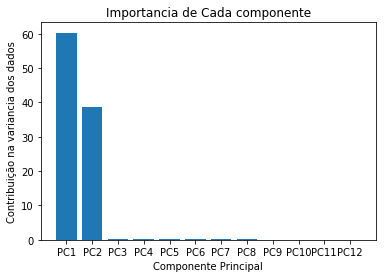

In [10]:
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)#grafico de barras
plt.ylabel('Contribuição na variancia dos dados')
plt.xlabel('Componente Principal')
plt.title('Importancia de Cada componente')
plt.show()
# com PC1 e PC2 temos mais de 90% da variancia dos dados

In [11]:
#dados nas PC's
pca_df = pd.DataFrame(pca_data, index=[*amostrasT, *amostrasK, *amostrasG], columns=labels)
print(pca_df)

          PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
T-1 -1.782514  2.699122 -0.097539  0.312786  0.037125 -0.033082  0.071468   
T-2 -1.572526  2.705191  0.342517 -0.018912 -0.156139 -0.011667  0.105260   
T-3 -1.933087  2.541299  0.220057 -0.168333 -0.045299  0.088229 -0.138275   
T-4 -1.833663  2.816439 -0.356318 -0.212029  0.012888  0.020687 -0.030992   
T-5 -1.777687  2.675030 -0.276949  0.125768  0.105791 -0.040362 -0.116726   
T-6 -1.644924  2.784457  0.187424 -0.034824  0.036294 -0.033142  0.115002   
K-1 -2.210470 -2.613595 -0.310741 -0.071131  0.113214  0.023356  0.088948   
K-2 -2.058368 -2.560438 -0.079421 -0.029823 -0.201949 -0.183706 -0.197150   
K-3 -1.988051 -2.542679  0.425396  0.129026  0.212684  0.001898 -0.130470   
K-4 -1.698818 -2.577123  0.041669 -0.155445 -0.023349 -0.048923  0.212390   
K-5 -2.321873 -2.597393 -0.056424  0.091793 -0.132912  0.323683 -0.013777   
K-6 -1.955392 -2.541874 -0.007954  0.040107  0.034514 -0.135563  0.057652   

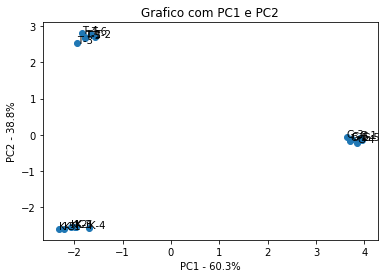

In [12]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('Grafico com PC1 e PC2')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

In [13]:
# Ordena as dimensões em ordem de influencia em em PC1

D = pd.Series(pca.components_[0], index=dimensoes)
top_dimesoes = D.abs().sort_values(ascending=False)
print(top_dimesoes)

dimensao6     0.370663
dimensao9     0.366868
dimensao8     0.357341
dimensao4     0.351053
dimensao1     0.345971
dimensao5     0.344271
dimensao10    0.282144
dimensao11    0.260172
dimensao12    0.180787
dimensao2     0.162195
dimensao7     0.132787
dimensao3     0.122264
dtype: float64
